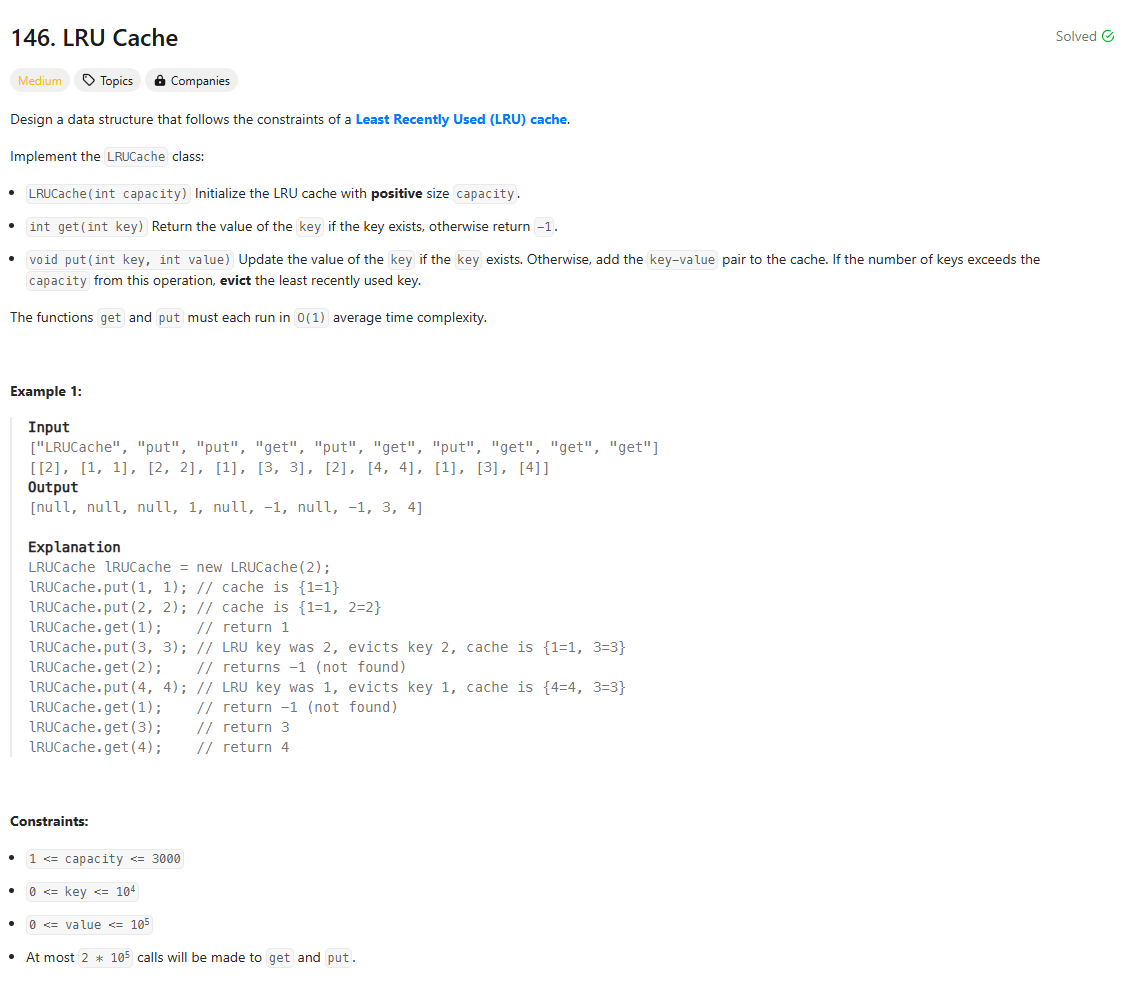

In [1]:
# DoublyLinkedList
# Time:
# * Put O(1)
# * Get O(1)
# Memory: O(n)
class Node:
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.next = None
        self.prev = None


class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def add_to_front(self, node):
        """Add a node to the front of the list."""
        node.next = self.head
        node.prev = None
        if self.head:
            self.head.prev = node
        else:
            self.tail = node
        self.head = node

    def remove_node(self, node):
        """Remove a node from the list."""
        if node.prev:
            node.prev.next = node.next
        else:
            self.head = node.next
        if node.next:
            node.next.prev = node.prev
        else:
            self.tail = node.prev

    def move_to_front(self, node):
        """Move an existing node to the front."""
        self.remove_node(node)
        self.add_to_front(node)

    def remove_last(self):
        """Remove and return the last node."""
        if not self.tail:
            return None
        node = self.tail
        self.remove_node(node)
        return node


class LRUCache:
    def __init__(self, capacity: int):
        self.capacity = capacity
        self.cache = {}
        self.history = DoublyLinkedList()

    def get(self, key: int) -> int:
        if key in self.cache:
            node = self.cache[key]
            self.history.move_to_front(node)
            return node.val
        return -1

    def put(self, key: int, value: int) -> None:
        if key in self.cache:
            node = self.cache[key]
            node.val = value
            self.history.move_to_front(node)
        else:
            if len(self.cache) >= self.capacity:
                last_node = self.history.remove_last()
                if last_node:
                    del self.cache[last_node.key]
            new_node = Node(key, value)
            self.history.add_to_front(new_node)
            self.cache[key] = new_node

    def print_cache(self):
        node = self.history.head
        while node:
            print(f"({node.key}, {node.val})", end=" -> ")
            node = node.next
        print("NULL")